# **Random Forest Regrossor**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


In [2]:
# Loading the Dataset
gold_dataset = pd.read_csv('gold_price_data.csv')
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Desctibe
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
# Info
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
#Shape
gold_dataset.shape

(2290, 6)

In [5]:
# Check for Null Values
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


<Axes: >

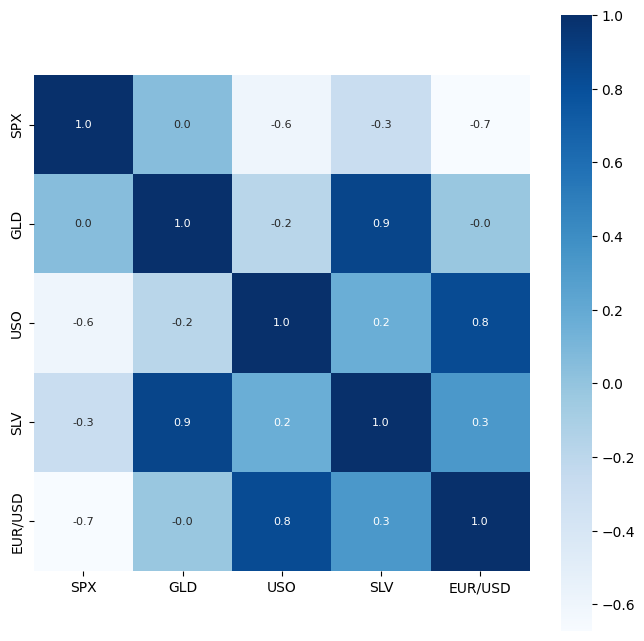

In [7]:

# Correlation and heatmap
correlation = gold_dataset.drop('Date', axis=1).corr() # Drop the 'Date' column before calculating correlation.
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


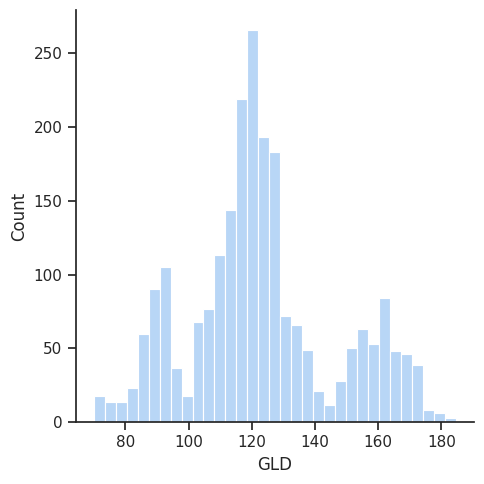

In [20]:
# Distribution of Gold Price
sns.set_theme(style='ticks', palette='pastel')
sns.displot(gold_dataset['GLD'])

In [8]:
# Seperate the Target Column and Date Column
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['GLD']

In [9]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [10]:
# Train and Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [11]:
# Shape after Split
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [12]:
# Model Training
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [13]:
# Model Evaluation
# First predict on training Data and calculte loss
training_data_prediction = regressor.predict(X_train)
# Loss Calculation
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_1

0.9983695831741894

In [14]:
# Test Data Prediction
test_data_prediction = regressor.predict(X_test)
# Loss Calculation
score_2 = metrics.r2_score(Y_test, test_data_prediction)
score_2

0.9894332538561603

In [15]:
# Compare the Actual Values and Predicted Values
Y_test = list(Y_test)
pd.DataFrame(data={'Actual Values':Y_test, 'Predicted Values':test_data_prediction, 'Difference':Y_test-test_data_prediction})

,Actual Values,Predicted Values,Difference
0,168.020004,168.564499,-0.544495
1,81.230003,82.113000,-0.882997
2,112.320000,116.410200,-4.090200
3,127.589996,127.814001,-0.224005
4,119.620003,120.782101,-1.162098
...,...,...,...
453,166.380005,166.712299,-0.332294
454,106.379997,108.199799,-1.819802
455,122.239998,121.715999,0.523999
456,133.830002,139.221501,-5.391499


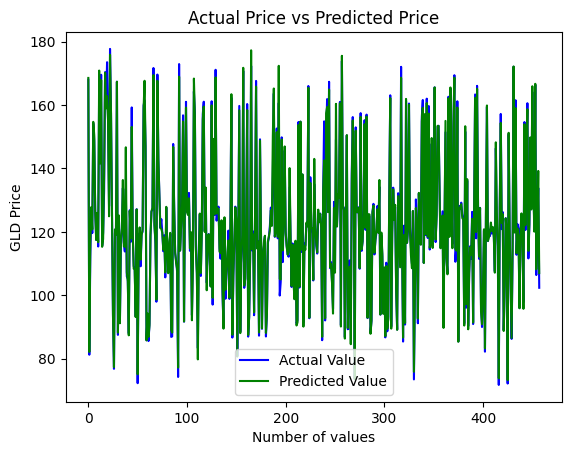

In [17]:
# Plot the Difference
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()